# Exercise 4.9 Data Visualization

2. examples from exercise 

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# create path shortcut for data import
path = r'/Users/sydneyhoy/Documents/Data Immersion/Achievement 4/02-2024 Instacart Basket Analysis'

In [4]:
# import dataset
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_grouped.pkl'))

<Axes: xlabel='orders_day_of_week'>

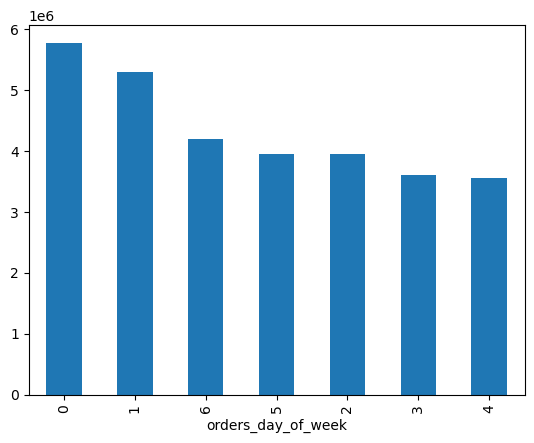

In [5]:
# create a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

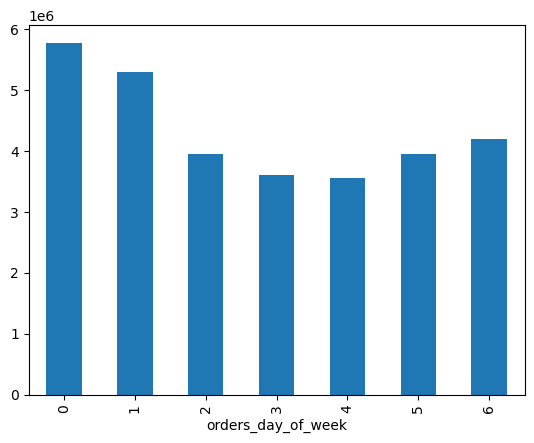

In [6]:
# sort days of week in sequential order
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

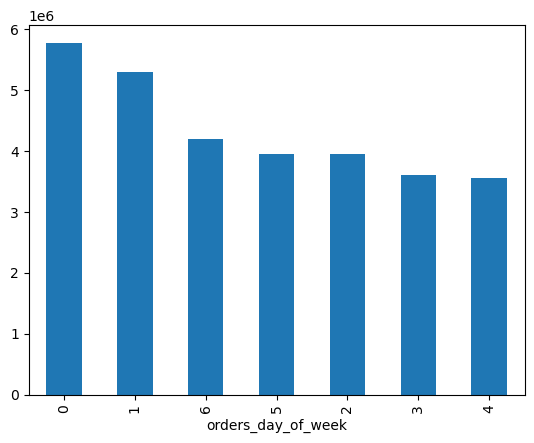

In [7]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

In [8]:
# export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

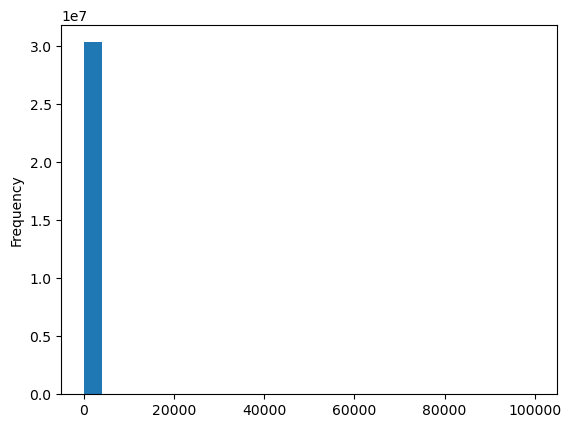

In [9]:
# create a histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

In [10]:
ords_prods_merge['prices'].describe()

count    3.032876e+07
mean     1.197725e+01
std      4.963730e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

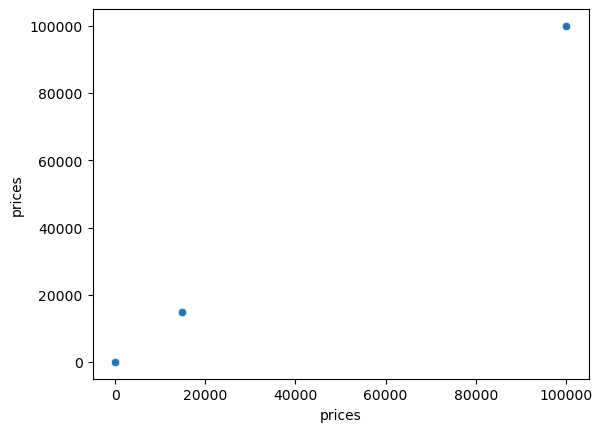

In [11]:
# create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [12]:
# check for outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order,spending_flag,median_order_frequency,order_frequency
8960343,912404,17,prior,12,2,14,5.0,21553,5,0,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,109.670103,High spender,5.0,Frequent customer
8960344,603376,17,prior,22,6,16,4.0,21553,3,1,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,109.670103,High spender,5.0,Frequent customer
8960345,3264360,135,prior,2,2,21,13.0,21553,6,0,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1250.245833,High spender,12.0,Regular customer
8960346,892534,135,prior,3,0,8,12.0,21553,3,1,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1250.245833,High spender,12.0,Regular customer
8960347,229704,342,prior,8,1,19,30.0,21553,9,0,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,120.090909,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27128304,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1137.802260,High spender,4.0,Frequent customer
27128305,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1137.802260,High spender,4.0,Frequent customer
27128306,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,487.075120,High spender,5.0,Frequent customer
27128307,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1235.679755,High spender,12.0,Regular customer


In [13]:
# ignore outliers
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [14]:
# check max price in dataset
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

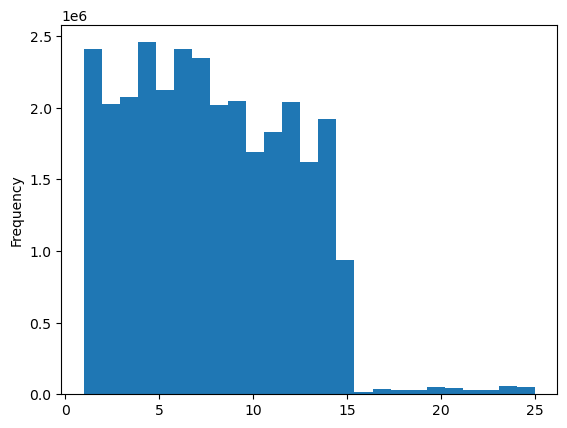

In [15]:
# recreate histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

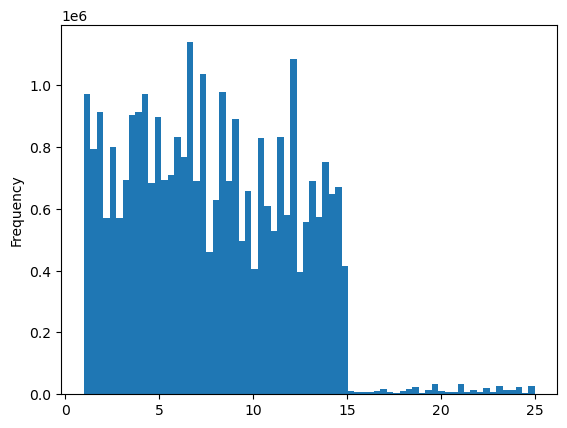

In [16]:
ords_prods_merge['prices'].plot.hist(bins = 70)

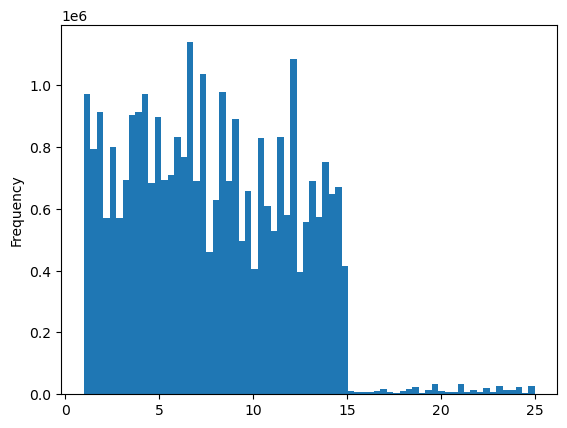

In [17]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [18]:
# export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [19]:
# create random subset for line chart
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [20]:
dev

array([False,  True, False, ...,  True, False,  True])

In [21]:
# store 70% of data from ords_prods_merge in big
big = ords_prods_merge[dev]

In [22]:
# store 30% of data of ords_prods_merge in small
small = ords_prods_merge[~dev]

In [23]:
# check accuracy of subsets
len(ords_prods_merge)

30328763

In [24]:
len(big)+len(small)

30328763

In [25]:
df_2 = small[['orders_day_of_week','prices']]

/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


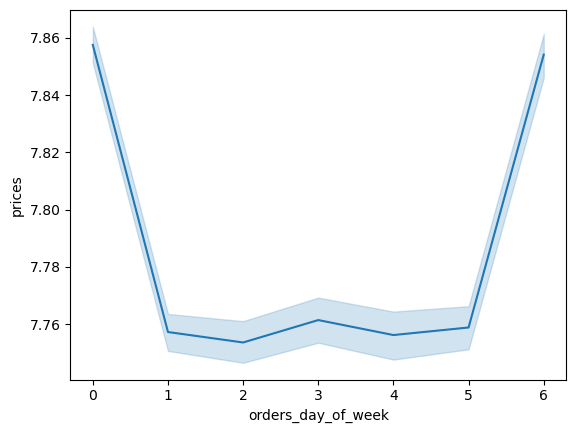

In [26]:
# create line chart of 30% of the data 
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Task Part 2: 
    import dataset from part 1

In [27]:
# import dataset customers_merged
customers_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_merged.pkl'))

3. Create a histogram of the order_hour_of_day colomn from customers_merged

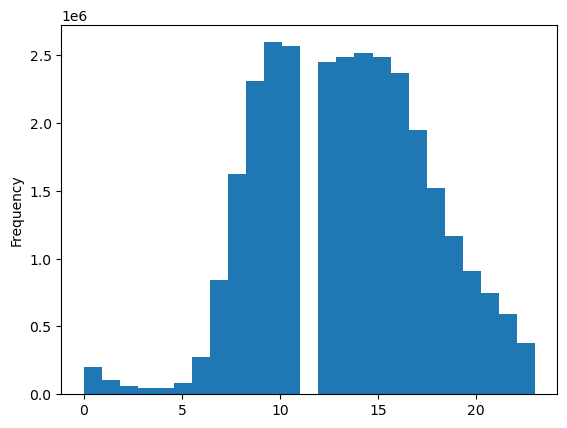

In [34]:
hist_order_hour_of_day = customers_merged['order_hour_of_day'].plot.hist(bins = 25)

The histogram shows that the mojority of orders are from around 9 am to 5pm with no orders around noon. 

In [66]:
# export histogram
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders.png'))

4. create a bar chart of the loyalty_flag

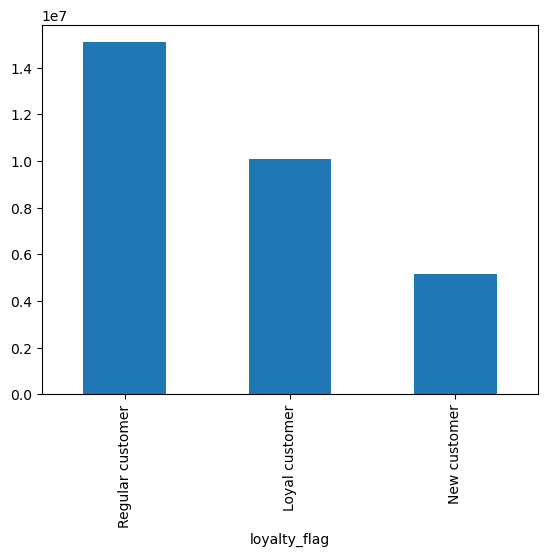

In [35]:
bar_loyalty_flag = customers_merged['loyalty_flag'].value_counts().plot.bar()

5. create a line chart to show the difference in prices depending on hour of day

In [67]:
# export bar chart
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [37]:
# create random subset for customers_merged
np.random.seed(4)
dev = np.random.rand(len(customers_merged)) <= 0.7

In [38]:
dev

array([False,  True, False, ...,  True, False,  True])

In [39]:
# store 70% of data for customers_merged in big
big = customers_merged[dev]

In [41]:
# store 30% of data for customers_merged in small
small = customers_merged[~dev]

In [42]:
len(customers_merged)

30328763

In [43]:
len(big)+len(small)

30328763

In [44]:
# subset of customers_merged that includes on the order_hour_of_day and prices
df_2 = small[['order_hour_of_day','prices']]

/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


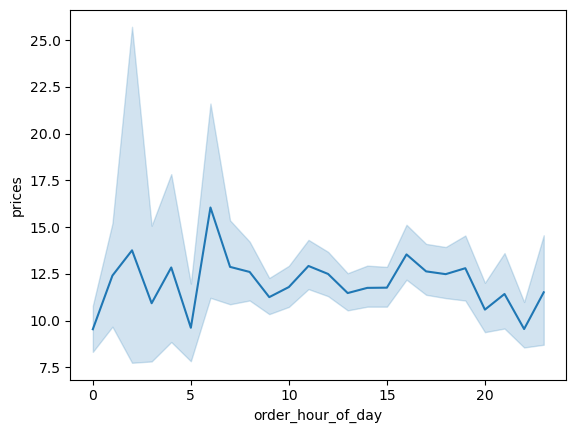

In [70]:
# create a line chart using 30% of the data
line_prices = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

6. create a line chart to look at relationship between age and number of dependents

In [71]:
# export line chart
line_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices.png'))

In [53]:
# subset of customers_merged that includes on the Age and n_dependents
df_3 = small[['Age','n_dependants']]

/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


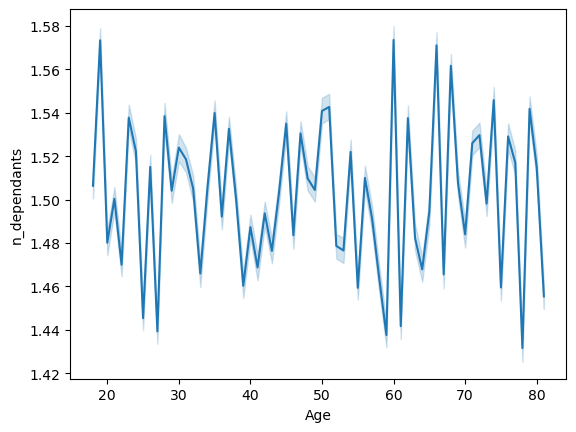

In [69]:
# create a line chart for age vs dependents using 30% of the data form customers_merged
line_age = sns.lineplot(data = df_3, x = 'Age',y = 'n_dependants')

the line chart does not show any relationship between age and number of dependents.

In [72]:
# export line chart
line_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age.png'))

7. create a scatterplot to look at the connection between age and income

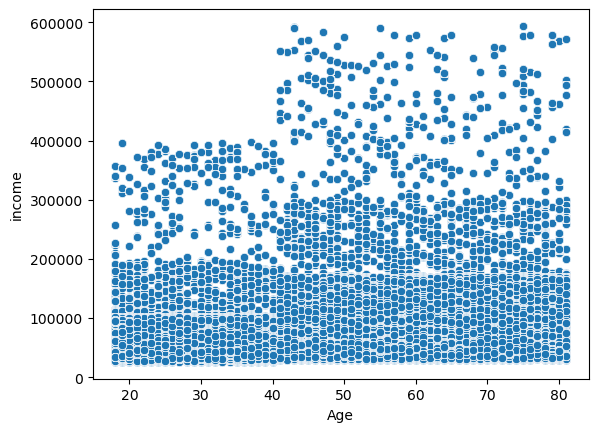

In [74]:
scatter_income = sns.scatterplot(x = 'Age', y = 'income',data = customers_merged)

the scatterplat shows the majority of the income across all customers is between 0 and 200000. There ia also an increase in income starting at 40 years where a lot of people are in the 200000 - 300000 and a comparitively small sample of people between 300000 and 600000 range after the age of 40.

In [75]:
scatter_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_income.png'))